# News Mood

## Observations:
1. From the observed news outlets, they all have a range of positive and negative tweet. No one news outlet only has positive or only has negative tweets
2. From the observed news outlets, it appears majority aim at having a neutral tweet
3. When looking at average compound, some news outlets may appear to be more positiv then others but it isn't always true since the polarity of a tweet ranges


In [1]:
#I chose the first challenge: News Mood

%matplotlib inline

In [2]:
# Dependencies
import tweepy
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


#import vader sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#get api_key from config file (USE YOUR OWN)
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

#establishes api_keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#gets today's date for the charts
now = datetime.datetime.now()

final_date=now.strftime("%m/%d/%Y")

In [19]:
# Target User Account
target_news = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

#dictionary that will hold all data
vader_dict = {"News": [],
              "Tweet":[],
              "Compound": [],
              "Positive": [],
              "Negative": [],
              "Neutral": [],
              "Tweet Ago": []}




In [20]:
#going through each news outlet
for news in target_news:
    counter = 1 #counter for tweets ago
    for x in range(1, 6): #5 pages for 100 tweets overall
        public_tweets = api.user_timeline(news, page=x) #grabs timeline tweets
        
        for tweet in public_tweets: #goes through ever tweet 
            #grabs name and text of tweet
            name = tweet["user"]["name"]
            text = tweet["text"]
            #polorizes tweet text
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            neutral = results["neu"]
            negative = results["neg"]
            
            #adds to dictionary
            vader_dict["News"].append(name)
            vader_dict["Tweet"].append(text)
            vader_dict["Compound"].append(compound)
            vader_dict["Positive"].append(positive)
            vader_dict["Negative"].append(negative)
            vader_dict["Neutral"].append(neutral)
            vader_dict["Tweet Ago"].append(counter)
            counter+=1 #tweet counter increases
      
   

In [21]:
#creates dataframe and prints it as csv
summary_df= pd.DataFrame(vader_dict)

summary_df.to_csv("./final_news_df.csv")
summary_df

,News,Tweet,Compound,Positive,Negative,Neutral,Tweet Ago
0,BBC,Chile has launched a huge hiking route through...,0.4215,0.257,0.000,0.743,1
1,BBC,🐣😍 Conservationists have been monitoring the p...,0.4215,0.135,0.000,0.865,2
2,BBC,'My children bought back the car I sold to pay...,-0.7003,0.000,0.293,0.707,3
3,BBC,RT @BBCEngland: Benny the beluga whale is spen...,0.5499,0.129,0.000,0.871,4
4,BBC,Always start by playing paper! 👊✋✌️\n\nThis is...,0.7088,0.329,0.000,0.671,5
5,BBC,'What do I know her from again?' 🤔📺\n\nThese a...,0.0000,0.000,0.000,1.000,6
6,BBC,This is the world's most dangerous city to be ...,-0.5256,0.000,0.253,0.747,7
7,BBC,"""New York City is underwhelming"". 😳😳😳\n \n#Unp...",-0.1860,0.156,0.227,0.616,8
8,BBC,What's it like growing up with tourettes?\n\nB...,0.4939,0.181,0.000,0.819,9
9,BBC,This school became a national leader by focusi...,-0.5267,0.000,0.254,0.746,10


In [22]:
#segments data into each news outlet to prepare for plotting
bbc_data = summary_df.loc[summary_df['News'] == "BBC"]
cbs_data = summary_df.loc[summary_df['News'] == "CBS"]
cnn_data = summary_df.loc[summary_df['News'] == "CNN"]
fox_data = summary_df.loc[summary_df['News'] == "Fox News"]
nyt_data = summary_df.loc[summary_df['News'] == "The New York Times"]

In [23]:
#gets x_axis for each news
bbc_x_axis = bbc_data["Tweet Ago"]
cbs_x_axis = cbs_data["Tweet Ago"]
cnn_x_axis = cnn_data["Tweet Ago"]
fox_x_axis = fox_data["Tweet Ago"]
nyt_x_axis = nyt_data["Tweet Ago"]

#gets y_axis for each news
bbc_y_axis = bbc_data["Compound"]
cbs_y_axis = cbs_data["Compound"]
cnn_y_axis = cnn_data["Compound"]
fox_y_axis = fox_data["Compound"]
nyt_y_axis = nyt_data["Compound"]

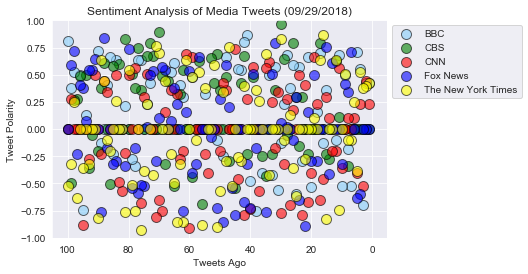

In [24]:
#plots each scatter and adds the properties
plt.scatter(x = bbc_x_axis, y = bbc_y_axis, marker='o', facecolors ="lightskyblue", edgecolors="black", s=100, alpha=.60, label="BBC")
plt.scatter(x =cbs_x_axis, y = cbs_y_axis, marker='o', facecolors ="green", edgecolors="black", s=100, alpha=.60, label="CBS")
plt.scatter(x = cnn_x_axis, y= cnn_y_axis, marker='o', facecolors ="red", edgecolors="black", s=100, alpha=.60, label= "CNN")
plt.scatter(x = fox_x_axis, y= fox_y_axis, marker='o', facecolors ="blue", edgecolors="black", s=100, alpha=.60, label= "Fox News")
plt.scatter(x = nyt_x_axis, y= nyt_y_axis, marker='o', facecolors ="yellow", edgecolors="black", s=100, alpha=.60, label= "The New York Times")
plt.xlim(105, -5)
plt.grid()
legend = plt.legend(loc = "best", bbox_to_anchor=(1, 1))
plt.title(f"Sentiment Analysis of Media Tweets ({final_date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.ylim(-1,1)
sns.set_style("darkgrid")
plt.savefig("./first_plot_scatter.png", bbox_inches="tight")

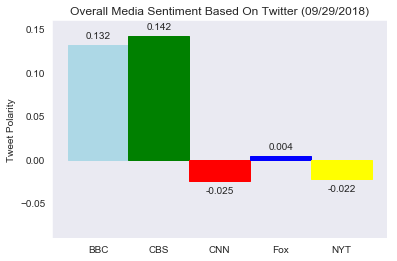

In [26]:
#gets the axis for each news for bar graph

bbc_axis = bbc_data.mean()["Compound"]
cbs_axis = cbs_data.mean()["Compound"]
cnn_axis = cnn_data.mean()["Compound"]
fox_axis = fox_data.mean()["Compound"]
nyt_axis = nyt_data.mean()["Compound"]

#prepares ticks and graphs into bar
bar_y_axis = [bbc_axis, cbs_axis, cnn_axis, fox_axis, nyt_axis]

bar_x_axis = np.arange(len(bar_y_axis))

colors = ['lightblue','green','red', 'blue', 'yellow']

tick_locations = [value for value in bar_x_axis]
bar_fig = plt.bar(bar_x_axis, bar_y_axis, color=colors, edgecolor=colors , alpha=1, align="center", width=1.0)
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.title(f"Overall Media Sentiment Based On Twitter ({final_date})")
plt.ylabel("Tweet Polarity")
plt.ylim(-.09, .16)
sns.set_style("dark")

#adds the labels at the end of each bar
values = bar_fig.patches


for value in values:
    
    y_bars = value.get_height()
    x_bars = value.get_x() + value.get_width() / 2
    space = 5
    va = 'bottom'
    if y_bars < 0:
        space *= -1
        va = 'top'
    label = "{:.3f}".format(y_bars)
    plt.annotate(label, (x_bars, y_bars), xytext=(0, space),textcoords="offset points", ha='center',va=va)                      
                                    
plt.savefig("./second_plot_bar.png", bbox_inches="tight")